# ARCHISHA SINHA

a. Implement suitable frequency domain Butterworth filter to blur the given test image

b. Change the filter order and summarize your findings when the filter order increases

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import math

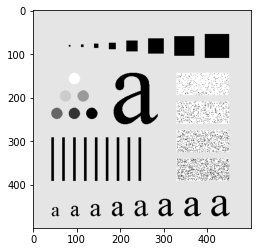

In [ ]:
image1=cv2.imread('Fig0333(a)(test_pattern_blurring_orig).tif',0)
plt.imshow(image1,cmap='gray')

In [ ]:
[m,n]=image1.shape
print(m,n)

500 500


To find eucledian distance

In [ ]:
def dist(x,y):
  distance=math.sqrt((x-m/2)**2 + (y-n/2)**2)
  return distance


Function to develop a LPF mask for frequency domain flitering, it takes radius as input


In [ ]:
def lpf_mask(d0):
 mask= np.zeros((m,n), dtype=int)
 for x in range(4):
  for i in range(0, m):
    for j in range(0,n):
        try:
          d1=dist(i,j)
          if d1<d0:
            mask[i][j]=1

        except IndexError:
            pass
  return mask


Function to apply mask on image and give filtered image as output

In [ ]:
def lpf_fdf(image):
  d0=int(input("Enter radius: "))
  masks=lpf_mask(d0)
  image_fft=np.fft.fft2(image)
  shifted_image=np.fft.fftshift(image_fft)
  image3=shifted_image*masks
  image3=np.fft.ifftshift(image3)
  image3=np.fft.ifft2(image3)
  final_image=np.real(image3)
  return final_image

Enter radius: 10
Enter radius: 20
Enter radius: 40
Enter radius: 300


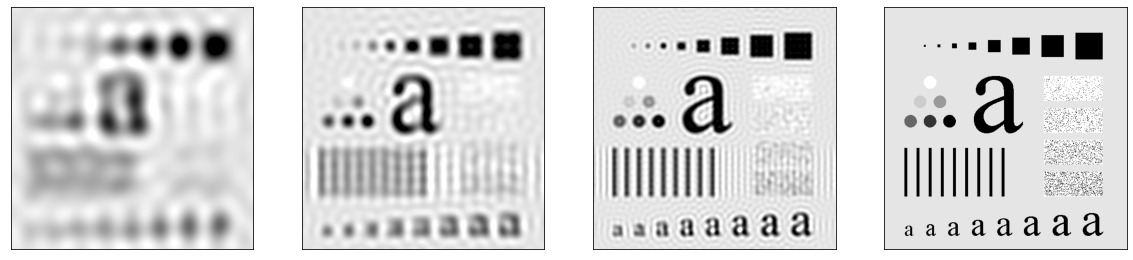

In [ ]:
plt.figure(figsize=(20,5))
for i in range(4):
  img=lpf_fdf(image1)
  plt.subplot(1,4,i+1)
  plt.yticks([])
  plt.xticks([])
  plt.imshow(img,cmap='gray',vmin=0,vmax=255)


Function to develop a HPF mask for frequency domain flitering: (takes radius as input)


In [ ]:
def hpf_mask(d0):
 mask= np.zeros((m,n), dtype=int)
 for x in range(4):
  for i in range(0, m):
    for j in range(0,n):
        try:
          d1=dist(i,j)
          if d1>=d0:
            mask[i][j]=1

        except IndexError:
            pass
  return mask


In [ ]:
def hpf_fdf(image):
  d0=int(input("Enter radius: "))
  masks=hpf_mask(d0)
  image_fft=np.fft.fft2(image)
  shifted_image=np.fft.fftshift(image_fft)
  image3=shifted_image*masks
  image3=np.fft.ifftshift(image3)
  image3=np.fft.ifft2(image3)
  final_image=np.real(image3)
  return final_image

Enter radius: 10
Enter radius: 20
Enter radius: 40
Enter radius: 300


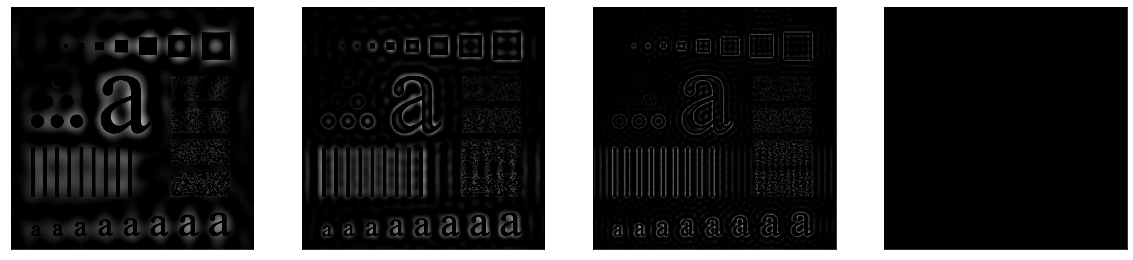

In [ ]:
plt.figure(figsize=(20,5))
for i in range(4):
  img=hpf_fdf(image1)
  plt.subplot(1,4,i+1)
  plt.yticks([])
  plt.xticks([])
  plt.imshow(img,cmap='gray',vmin=0,vmax=255)


For Butterworth LPF for filter order=1


In [ ]:
def butter_lpf_mask(d0):
 mask= np.zeros((m,n), dtype=float)
 for i in range(0, m):
    for j in range(0,n):
      d=dist(i,j)
      val=1/(1+((d/d0)**2))
      mask[i,j]=val

 return mask


In [ ]:
def butter_lpf_fdf(image):
  d0=int(input("Enter radius: "))
  masks=butter_lpf_mask(d0)
  image_fft=np.fft.fft2(image)
  shifted_image=np.fft.fftshift(image_fft)
  image3=shifted_image*masks
  image3=np.fft.ifftshift(image3)
  image3=np.fft.ifft2(image3)
  final_image=np.real(image3)
  return final_image

Enter radius: 10
Enter radius: 20
Enter radius: 40
Enter radius: 300


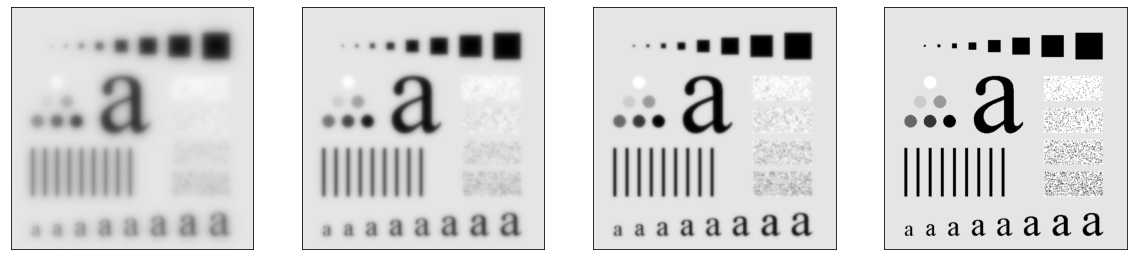

In [ ]:
plt.figure(figsize=(20,5))
for i in range(4):
  img=butter_lpf_fdf(image1)
  plt.subplot(1,4,i+1)
  plt.yticks([])
  plt.xticks([])
  plt.imshow(img,cmap='gray',vmin=0,vmax=255)


CONCLUSION:
1. As the radius of the image increases, the sharpenes of the image also increases.
2. In normal HPF we can see the ringing effect, whereas in butter lpf we do not see ringing effect.
